Píldoras de elaboración de TFG del Grado en Economía, sobre la concentración bancaria en España. Siguiendo la Metodología de tratamiento CRISP-DM, adaptada al caso. 
Píldoras sencillas del formato de tratamiento y limpieza, el código esta incompleto por motivos de autoría el trabajo (replicar el EDA completo sería muy fácil).

In [ ]:
#1.	Leerlo como un dataframe (con la librería pandas). Hacemos la práctica en Google Colab

import pandas as pd
from google.colab import drive

# 1. Montamos Google Drive
drive.mount('/content/drive')

# 2. Definir la ruta del archivo
ruta_archivo = 'ruta_del_trabajo_local'

# 3. Cargar el archivo CSV con manejo de errores
try:
    df_list_todos = pd.read_csv(ruta_archivo, encoding='ISO-8859-1')
    print(df_list_todos.head())  # Imprimir las primeras filas
except UnicodeDecodeError:
    try:
        df_list_todos = pd.read_csv(ruta_archivo, encoding='Windows-1252')
        print(df_list_todos.head())  # Imprimir las primeras filas
    except Exception as e:
        print(f"Ocurrió un error al cargar el archivo con Windows-1252: {e}")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo con ISO-8859-1: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Cód. Tipo Entidad ; Tipo Entidad ; Cód. Entidad ; Entidad ; Cód. País ; País ; Cód. Provincia ; Provincia ; Cód. Municipio ; Municipio ; Nº de oficinas 
0  BP;BANCOS;3;BANCO DE DEPOSITOS   S.A.;ES;ESPAÑ...                                                                                                      
1  BP;BANCOS;11;ALLFUNDS BANK   S.A.;ES;ESPAÑA;28...                                                                                                      
2  BP;BANCOS;19;DEUTSCHE BANK   S.A.E.;ES;ESPAÑA;...                                                                                                      
3  BP;BANCOS;19;DEUTSCHE BANK   S.A.E.;ES;ESPAÑA;...                                                                                                      
4  BP;BANCOS;19;DEUTSCHE BANK   S.A.E.;ES;ESPAÑA;...                                            

*Comienza la limpieza y edición de los datos (que son de procedencia heterogénea)*

In [5]:
import pandas as pd


# Paso 1: Verificar el contenido inicial del DataFrame
print("Contenido inicial del DataFrame:")
print(df_list_todos.head())


Contenido inicial del DataFrame:
  Cód. Tipo Entidad ; Tipo Entidad ; Cód. Entidad ; Entidad ; Cód. País ; País ; Cód. Provincia ; Provincia ; Cód. Municipio ; Municipio ; Nº de oficinas 
0  BP;BANCOS;3;BANCO DE DEPOSITOS   S.A.;ES;ESPAÑ...                                                                                                      
1  BP;BANCOS;11;ALLFUNDS BANK   S.A.;ES;ESPAÑA;28...                                                                                                      
2  BP;BANCOS;19;DEUTSCHE BANK   S.A.E.;ES;ESPAÑA;...                                                                                                      
3  BP;BANCOS;19;DEUTSCHE BANK   S.A.E.;ES;ESPAÑA;...                                                                                                      
4  BP;BANCOS;19;DEUTSCHE BANK   S.A.E.;ES;ESPAÑA;...                                                                                                      


In [ ]:
# Paso 2: Verificar el número de columnas

print("Número de columnas:", len(df_list_todos.columns))
print("Nombres actuales de las columnas:")
print(df_list_todos.columns)

Número de columnas: 1
Nombres actuales de las columnas:
Index([' Cód. Tipo Entidad ; Tipo Entidad ; Cód. Entidad ; Entidad ; Cód. País ; País ; Cód. Provincia ; Provincia ; Cód. Municipio ; Municipio ; Nº de oficinas '], dtype='object')


In [8]:
# Paso 4: Asignar nombres a las columnas
df_list_todos.columns = [
    "Cód. Tipo Entidad",
    "Tipo Entidad",
    "Cód. Entidad",
    "Entidad",
    "Cód. País",
    "País",
    "Cód. Provincia",
    "Provincia",
    "Cód. Municipio",
    "Municipio",
    "Nº de oficinas"
]


In [9]:
# Paso 5: Limpiar datos
# Eliminar espacios adicionales en todas las columnas
df_list_todos = df_list_todos.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [ ]:
# Convertir la columna "Nº de oficinas" a numérico
df_list_todos["Nº de oficinas"] = pd.to_numeric(df_list_todos["Nº de oficinas"], errors='coerce')

In [ ]:
# Mostrar las primeras filas después de la limpieza
print("\nDataFrame después de limpiar los datos:")
print(df_list_todos.head())


DataFrame después de limpiar los datos:
  Cód. Tipo Entidad Tipo Entidad Cód. Entidad                    Entidad  \
0                BP       BANCOS            3  BANCO DE DEPOSITOS   S.A.   
1                BP       BANCOS           11       ALLFUNDS BANK   S.A.   
2                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   
3                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   
4                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   

  Cód. País    País Cód. Provincia Provincia Cód. Municipio         Municipio  \
0        ES  ESPAÑA             28    Madrid             79            MADRID   
1        ES  ESPAÑA             28    Madrid             79            MADRID   
2        ES  ESPAÑA              1     Alava             59   VITORIA-GASTEIZ   
3        ES  ESPAÑA              3  Alicante             14  ALICANTE/ALACANT   
4        ES  ESPAÑA              3  Alicante             18             ALTEA   

   Nº de oficin

In [ ]:
df_list_todos["Nº de oficinas"] = df_list_todos["Nº de oficinas"].fillna(0).astype(int)

In [ ]:
# Paso 6. Contar valores faltantes en la columna "Nº de oficinas"
print("\nNúmero de valores faltantes en 'Nº de oficinas':")
print(df_list_todos["Nº de oficinas"].isnull().sum())


Número de valores faltantes en 'Nº de oficinas':
0


In [ ]:
# Verificar espacios adicionales en las columnas de texto
for col in df_list_todos.columns:
    if df_list_todos[col].dtype == "object":  # Solo revisar columnas de texto
        print(f"\nEspacios adicionales en la columna '{col}':")
        print(df_list_todos[col].str.len().unique())  # Longitud de los valores


Espacios adicionales en la columna 'Cód. Tipo Entidad':
[ 2 14  4  3  8 21 12 37]

Espacios adicionales en la columna 'Tipo Entidad':
[ 6  0 15 23 17 28 35 34  8]

Espacios adicionales en la columna 'Cód. Entidad':
[1 2 3 0 4 8]

Espacios adicionales en la columna 'Entidad':
[25 20 22 27 18 16 24 23 15 36  0 32 19 35 28 33 21 31 29 14 34 26 40 30
 37 17 13  8]

Espacios adicionales en la columna 'Cód. País':
[2 0 8]

Espacios adicionales en la columna 'País':
[6 0 8]

Espacios adicionales en la columna 'Cód. Provincia':
[2 1 0 8]

Espacios adicionales en la columna 'Provincia':
[ 6  5  8  7 14  9 11  4 10 20  0]

Espacios adicionales en la columna 'Cód. Municipio':
[2 3 1 0]

Espacios adicionales en la columna 'Municipio':
[ 6 15 16  5 13  9  4  7 10 20  8 21 27 22 11 17 18 14 28 25 12 19  3 47
 23 24 26 30 41  0 35 36 29 32 43 31 33 34 42 39]


In [ ]:
print("\nDataFrame después de limpiar los datos:")
print(df_list_todos.head())


DataFrame después de limpiar los datos:
  Cód. Tipo Entidad Tipo Entidad Cód. Entidad                    Entidad  \
0                BP       BANCOS            3  BANCO DE DEPOSITOS   S.A.   
1                BP       BANCOS           11       ALLFUNDS BANK   S.A.   
2                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   
3                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   
4                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   

  Cód. País    País Cód. Provincia Provincia Cód. Municipio         Municipio  \
0        ES  ESPAÑA             28    Madrid             79            MADRID   
1        ES  ESPAÑA             28    Madrid             79            MADRID   
2        ES  ESPAÑA              1     Alava             59   VITORIA-GASTEIZ   
3        ES  ESPAÑA              3  Alicante             14  ALICANTE/ALACANT   
4        ES  ESPAÑA              3  Alicante             18             ALTEA   

   Nº de oficin

*Data preparation: aparentemente los datos están correctos para iniciar las agregaciones potenciales*

In [ ]:
# Tabla 1: Número de oficinas por entidad y provincia
tabla1 = (
    df_list_todos.groupby(["Provincia", "Entidad"])["Nº de oficinas"]
    .sum()
    .reset_index()
    .rename(columns={"Nº de oficinas": "Total Oficinas"})
)
print("\nTabla 1: Número de oficinas por entidad y provincia")
print(tabla1)


Tabla 1: Número de oficinas por entidad y provincia
     Provincia                             Entidad  Total Oficinas
0                                                            14281
1                                         ########               0
2                            EUROCAJA RURAL S.C.C.            3472
3     A Coruña  ABANCA CORPORACION BANCARIA   S.A.             161
4     A Coruña        ABANCA SERVICIOS FINANCIEROS               2
...        ...                                 ...             ...
1184     Ávila              DEUTSCHE BANK   S.A.E.               1
1185     Ávila               EUROCAJA RURAL S.C.C.              12
1186     Ávila               IBERCAJA BANCO   S.A.               1
1187     Ávila                RENTA 4 BANCO   S.A.               1
1188     Ávila                UNICAJA BANCO   S.A.               6

[1189 rows x 3 columns]


In [ ]:
# Tabla 2: Número total de oficinas agrupadas por tipo de entidad
tabla2 = (
  df_list_todos.groupby("Tipo Entidad")["Nº de oficinas"]
    .sum()
    .reset_index()
    .rename(columns={"Nº de oficinas": "Total Oficinas"})
)
print("\nTabla 2: Número total de oficinas agrupadas por tipo de entidad")
print(tabla2)


Tabla 2: Número total de oficinas agrupadas por tipo de entidad
                           Tipo Entidad  Total Oficinas
0                                                 17753
1                              ########               0
2                                BANCOS           13003
3                       CAJAS DE AHORRO              69
4                     COMPRA VENTA M.E.             176
5               COOPERATIVAS DE CREDITO            4176
6                       CREDITO OFICIAL               1
7                     ENTIDADES DE PAGO             124
8   ESTABLEC. FINANC. CREDITO ENT. PAGO              14
9          ESTABLECIMIENTOS FINANCIEROS              56
10   SUCUR.ENT.FINAN.FILIAL.CTO.COMUNIT               1
11              SUCURSALES COMUNITARIAS             129
12         SUCURSALES EXTRACOMUNITARIAS               4


In [ ]:
# Mostrar las columnas del DataFrame
print("Columnas disponibles en el DataFrame:")
print(df_list_todos.columns)

Columnas disponibles en el DataFrame:
Index(['Cód. Tipo Entidad', 'Tipo Entidad', 'Cód. Entidad', 'Entidad',
       'Cód. País', 'País', 'Cód. Provincia', 'Provincia', 'Cód. Municipio',
       'Municipio', 'Nº de oficinas'],
      dtype='object')


In [ ]:
# Crear la columna comunidad autónoma
# Diccionario para mapear provincias a comunidades autónomas
provincias_a_comunidades = {
    "Álava": "País Vasco",
    "Albacete": "Castilla-La Mancha",
    "Alicante": "Comunidad Valenciana",
    "Almería": "Andalucía",
    "Asturias": "Principado de Asturias",
    "Ávila": "Castilla y León",
    "Badajoz": "Extremadura",
    "Baleares, Islas": "Islas Baleares",
    "Barcelona": "Cataluña",
    "Burgos": "Castilla y León",
    "Cáceres": "Extremadura",
    "Cádiz": "Andalucía",
    "Cantabria": "Cantabria",
    "Castellón": "Comunidad Valenciana",
    "Ciudad Real": "Castilla-La Mancha",
    "Córdoba": "Andalucía",
    "Coruña, A": "Galicia",
    "Cuenca": "Castilla-La Mancha",
    "Gipuzkoa": "País Vasco",
    "Granada": "Andalucía",
    "Guadalajara": "Castilla-La Mancha",
    "Huelva": "Andalucía",
    "Huesca": "Aragón",
    "Jaén": "Andalucía",
    "León": "Castilla y León",
    "Lugo": "Galicia",
    "Madrid": "Comunidad de Madrid",
    "Málaga": "Andalucía",
    "Murcia": "Región de Murcia",
    "Navarra": "Comunidad Foral de Navarra",
    "Ourense": "Galicia",
    "Palencia": "Castilla y León",
    "Pontevedra": "Galicia",
    "Salamanca": "Castilla y León",
    "Segovia": "Castilla y León",
    "Sevilla": "Andalucía",
    "Soria": "Castilla y León",
    "Tarragona": "Cataluña",
    "Santa Cruz de Tenerife": "Canarias",
    "Teruel": "Aragón",
    "Toledo": "Castilla-La Mancha",
    "Valencia": "Comunidad Valenciana",
    "Valladolid": "Castilla y León",
    "Vizcaya": "País Vasco",
    "Zamora": "Castilla y León",
    "Zaragoza": "Aragón"
}

In [ ]:
# Crear la columna "Comunidad Autónoma" basada en la columna "Provincia"
df_list_todos["Comunidad Autónoma"] = df_list_todos["Provincia"].map(provincias_a_comunidades)

# Mostrar las primeras filas del DataFrame con la nueva columna
print("\nDataFrame con la columna 'Comunidad Autónoma':")
print(df_list_todos.head())


DataFrame con la columna 'Comunidad Autónoma':
  Cód. Tipo Entidad Tipo Entidad Cód. Entidad                    Entidad  \
0                BP       BANCOS            3  BANCO DE DEPOSITOS   S.A.   
1                BP       BANCOS           11       ALLFUNDS BANK   S.A.   
2                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   
3                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   
4                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   

  Cód. País    País Cód. Provincia Provincia Cód. Municipio         Municipio  \
0        ES  ESPAÑA             28    Madrid             79            MADRID   
1        ES  ESPAÑA             28    Madrid             79            MADRID   
2        ES  ESPAÑA              1     Alava             59   VITORIA-GASTEIZ   
3        ES  ESPAÑA              3  Alicante             14  ALICANTE/ALACANT   
4        ES  ESPAÑA              3  Alicante             18             ALTEA   

   Nº de

In [ ]:
# Generar la tabla 3
tabla3 = (
    df_list_todos.groupby(["Comunidad Autónoma", "Provincia", "Tipo Entidad"])["Nº de oficinas"]
    .sum()
    .reset_index()
    .rename(columns={"Nº de oficinas": "Total Oficinas"})
)

# Mostrar la tabla 3
print("\nTabla 3: Distribución del número de oficinas por provincias y comunidades autónomas")
print(tabla3)


Tabla 3: Distribución del número de oficinas por provincias y comunidades autónomas
    Comunidad Autónoma Provincia                  Tipo Entidad  Total Oficinas
0            Andalucía   Almería                        BANCOS             157
1            Andalucía   Almería             COMPRA VENTA M.E.               2
2            Andalucía   Almería       COOPERATIVAS DE CREDITO             139
3            Andalucía   Almería             ENTIDADES DE PAGO               3
4            Andalucía   Almería  ESTABLECIMIENTOS FINANCIEROS               1
..                 ...       ...                           ...             ...
155   Región de Murcia    Murcia             COMPRA VENTA M.E.               4
156   Región de Murcia    Murcia       COOPERATIVAS DE CREDITO             172
157   Región de Murcia    Murcia             ENTIDADES DE PAGO               3
158   Región de Murcia    Murcia  ESTABLECIMIENTOS FINANCIEROS               2
159   Región de Murcia    Murcia       SUCURSA

*Tablas y Gráficos Requeridos*

1. Tabla 1: Distribución de oficinas bancarias por tipo de entidad
Descripción : Esta tabla muestra el número total de oficinas agrupadas por tipo de entidad (por ejemplo, bancos, cooperativas de crédito, etc.).
Formato APA :
Título claro y descriptivo.
Alineación centrada para los datos.
Nota explicativa si es necesario.

In [ ]:
# Generar la tabla 1
tabla1 = (
    df_list_todos.groupby("Tipo Entidad")["Nº de oficinas"]
    .sum()
    .reset_index()
    .rename(columns={"Nº de oficinas": "Total Oficinas"})
)

# Formatear la tabla según APA
def format_table_apa(table, title):
    return table.style.set_caption(title).set_table_styles(
        [{"selector": "caption", "props": [("text-align", "center"), ("font-size", "14px"), ("font-weight", "bold")]}]
    ).set_properties(**{"text-align": "center"}).set_table_styles([{"selector": "th", "props": [("text-align", "center")]}])

# Aplicar formato APA
tabla1_apa = format_table_apa(tabla1, "Tabla 1. Número total de oficinas por tipo de entidad")

# Mostrar la tabla
display(tabla1_apa)


,Tipo Entidad,Total Oficinas
0,,17753
1,########,0
2,BANCOS,13003
3,CAJAS DE AHORRO,69
4,COMPRA VENTA M.E.,176
5,COOPERATIVAS DE CREDITO,4176
6,CREDITO OFICIAL,1
7,ENTIDADES DE PAGO,124
8,ESTABLEC. FINANC. CREDITO ENT. PAGO,14
9,ESTABLECIMIENTOS FINANCIEROS,56


2. Tabla 2: Número de oficinas por provincia y tipo de entidad
Descripción : Esta tabla muestra el número de oficinas agrupadas por provincia y tipo de entidad.
Formato APA :
Título claro y descriptivo.
Datos alineados al centro.

In [ ]:
# Generar la tabla 2
tabla2 = (
    df_list_todos.groupby(["Provincia", "Tipo Entidad"])["Nº de oficinas"]
    .sum()
    .reset_index()
    .rename(columns={"Nº de oficinas": "Total Oficinas"})
)

# Aplicar formato APA
tabla2_apa = format_table_apa(tabla2, "Tabla 2. Número de oficinas por provincia y tipo de entidad")

# Mostrar la tabla
display(tabla2_apa)

,Provincia,Tipo Entidad,Total Oficinas
0,,,17753
1,,########,0
2,A Coruña,BANCOS,391
3,A Coruña,COOPERATIVAS DE CREDITO,6
4,A Coruña,ESTABLEC. FINANC. CREDITO ENT. PAGO,2
5,A Coruña,SUCURSALES COMUNITARIAS,3
6,Alava,BANCOS,104
7,Alava,COMPRA VENTA M.E.,1
8,Alava,COOPERATIVAS DE CREDITO,47
9,Albacete,BANCOS,76


*Nota del autor: He eliminado en este apartado Celdas de código del EDA*

In [ ]:
*Algunas gráficas y visualizaciones*

3. Gráfico 1: Evolución del número de oficinas por tipo de entidad
Descripción : Un gráfico de barras que muestra la evolución del número de oficinas por tipo de entidad.
Formato APA :
Título claro y descriptivo.
Etiquetas de ejes claras.
Leyenda si hay múltiples categorías.

In [ ]:
# Renombrar la columna si es necesario
if "Población" in df_list_todos.columns:
    df_list_todos.rename(columns={"Población": "Poblacion"}, inplace=True)

# Verificar nuevamente las columnas
print("\nColumnas después de la corrección:")
print(df_list_todos.columns)


Columnas después de la corrección:
Index(['Cód. Tipo Entidad', 'Tipo Entidad', 'Cód. Entidad', 'Entidad',
       'Cód. País', 'País', 'Cód. Provincia', 'Provincia', 'Cód. Municipio',
       'Municipio', 'Nº de oficinas', 'Comunidad Autónoma'],
      dtype='object')


In [ ]:
#  Tabla 3: Municipios sin acceso a servicios financieros
# Descripción : Esta tabla muestra los municipios que no tienen acceso a servicios financieros, basándose en el número de habitantes.
# Formato APA : Título claro y descriptivo.
# Nota explicativa sobre los criterios utilizados.
# Mostrar las columnas disponibles
print("Columnas disponibles en el DataFrame:")
print(df_list_todos.columns)

# Paso 2: Filtrar municipios sin oficinas
municipios_sin_acceso = df_list_todos[df_list_todos["Nº de oficinas"] == 0]

# Paso 3: Generar la tabla
tabla3 = municipios_sin_acceso[["Provincia", "Municipio"]].reset_index(drop=True)

# Paso 4: Formatear la tabla según APA
def format_table_apa(table, title):
    return table.style.set_caption(title).set_table_styles(
        [{"selector": "caption", "props": [("text-align", "center"), ("font-size", "14px"), ("font-weight", "bold")]}]
    ).set_properties(**{"text-align": "center"}).set_table_styles([{"selector": "th", "props": [("text-align", "center")]}])

# Aplicar formato APA
tabla3_apa = format_table_apa(tabla3, "Tabla 3. Municipios sin acceso a servicios financieros")

# Mostrar la tabla
display(tabla3_apa)

Columnas disponibles en el DataFrame:
Index(['Cód. Tipo Entidad', 'Tipo Entidad', 'Cód. Entidad', 'Entidad',
       'Cód. País', 'País', 'Cód. Provincia', 'Provincia', 'Cód. Municipio',
       'Municipio', 'Nº de oficinas', 'Comunidad Autónoma'],
      dtype='object')


,Provincia,Municipio
0,,
1,,
2,,
3,,
4,,Fecha de Referencia: 30/09/2024


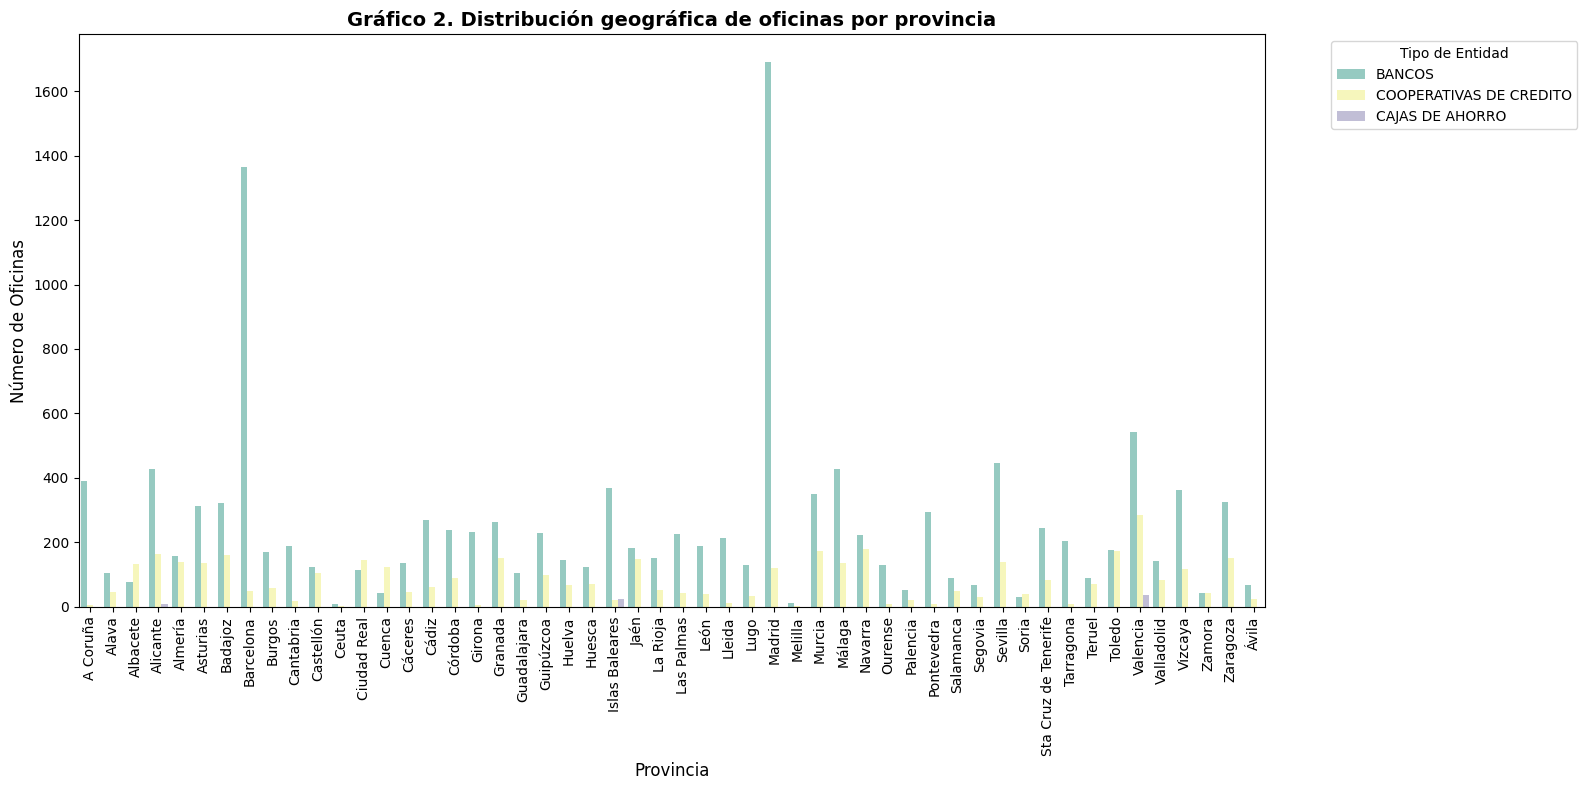

In [ ]:

# Distribución geográfica de oficinas por provincias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Paso 2: Agrupar por Provincia y Tipo Entidad
oficinas_por_provincia_tipo = df_list_todos.groupby(["Provincia", "Tipo Entidad"])["Nº de oficinas"].sum().reset_index()

# Paso 3: Filtrar entidades principales
entidades_principales = ["BANCOS", "CAJAS DE AHORRO", "COOPERATIVAS DE CREDITO"]
oficinas_por_provincia_tipo_filtrado = oficinas_por_provincia_tipo[oficinas_por_provincia_tipo["Tipo Entidad"].isin(entidades_principales)]

# Paso 4: Generar el gráfico
plt.figure(figsize=(16, 8))
sns.barplot(data=oficinas_por_provincia_tipo_filtrado, x="Provincia", y="Nº de oficinas", hue="Tipo Entidad", palette="Set3")
plt.title("Gráfico 2. Distribución geográfica de oficinas por provincia", fontsize=14, fontweight="bold")
plt.xlabel("Provincia", fontsize=12)
plt.ylabel("Número de Oficinas", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Tipo de Entidad", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()


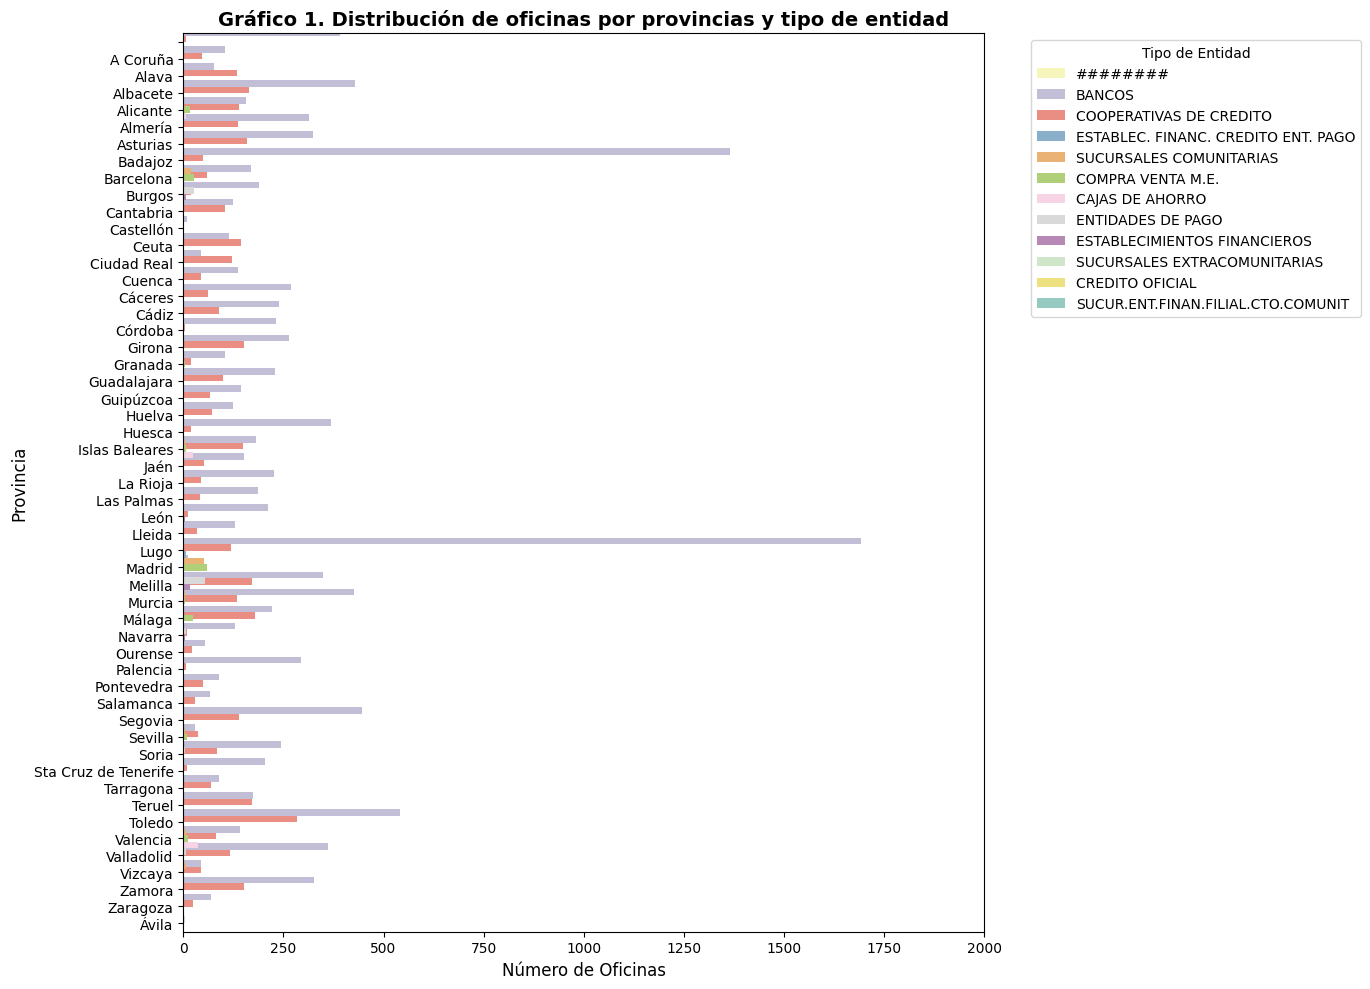

In [ ]:
# Ahora generar un gráfico de barras apiladas pero por comunidades autónomas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Paso 2: Agrupar datos por Provincia y Tipo Entidad
oficinas_por_provincia_tipo = (
    df_list_todos.groupby(["Provincia", "Tipo Entidad"])["Nº de oficinas"]
    .sum()
    .reset_index()
)

# Paso 3: Crear el gráfico de barras apiladas horizontales
plt.figure(figsize=(14, 10))
sns.barplot(
    data=oficinas_por_provincia_tipo,
    y="Provincia",
    x="Nº de oficinas",
    hue="Tipo Entidad",
    palette="Set3",
    orient="h",
    saturation=0.75,  # Intensidad del color
    width=5  # Grosor de las barras
)

# Acotar el eje horizontal a un máximo de 2000 oficinas
plt.xlim(0, 2000)

plt.tight_layout()

# Personalizar el gráfico
plt.title("Gráfico 1. Distribución de oficinas por provincias y tipo de entidad", fontsize=14, fontweight="bold")
plt.xlabel("Número de Oficinas", fontsize=12)
plt.ylabel("Provincia", fontsize=12)
plt.legend(title="Tipo de Entidad", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()


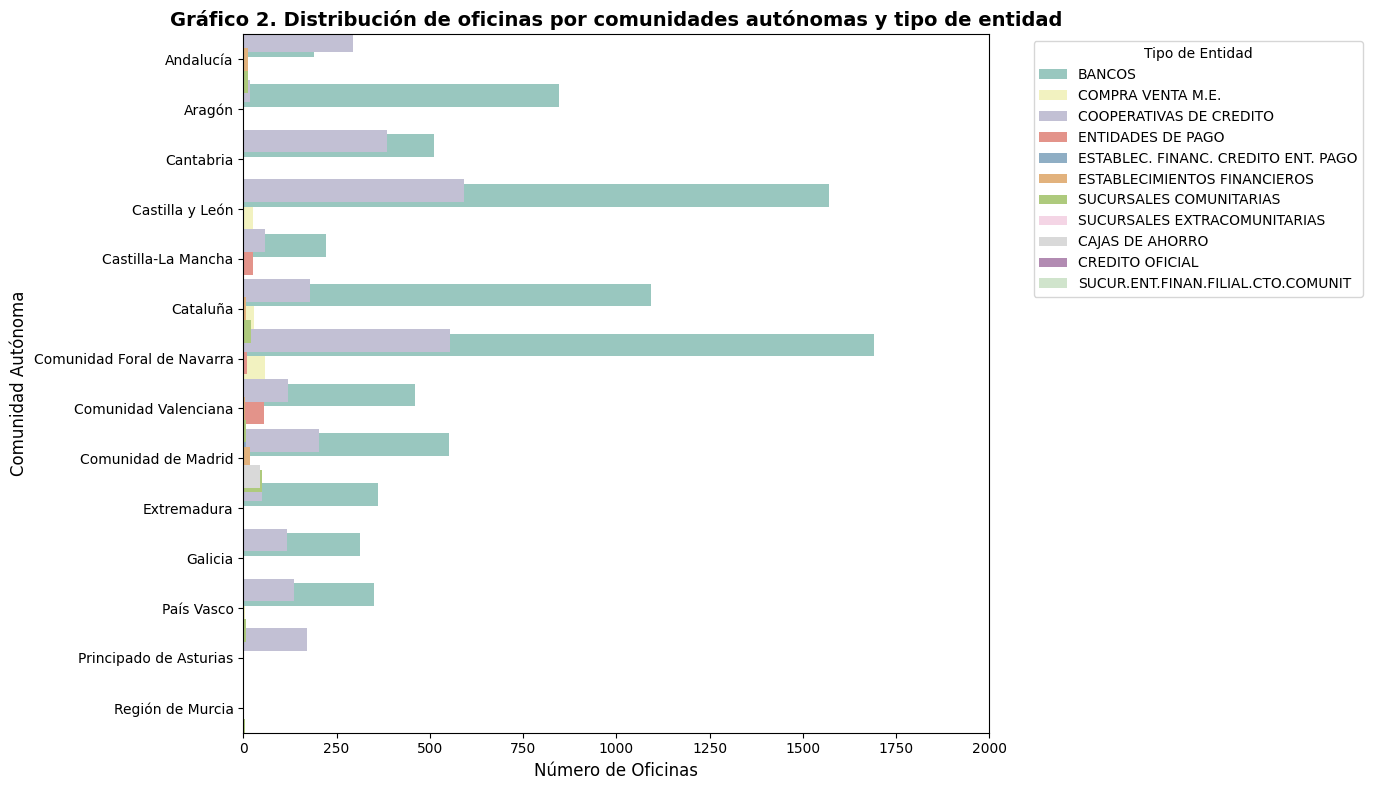

In [ ]:
# Gráfico por comunidades autónomas y por tipo de entidad

provincias_a_comunidades = {
    "Álava": "País Vasco",
    "Albacete": "Castilla-La Mancha",
    "Alicante": "Comunidad Valenciana",
    "Almería": "Andalucía",
    "Asturias": "Principado de Asturias",
    "Ávila": "Castilla y León",
    "Badajoz": "Extremadura",
    "Baleares, Islas": "Islas Baleares",
    "Barcelona": "Cataluña",
    "Burgos": "Castilla y León",
    "Cáceres": "Extremadura",
    "Cádiz": "Andalucía",
    "Cantabria": "Cantabria",
    "Castellón": "Comunidad Valenciana",
    "Ciudad Real": "Castilla-La Mancha",
    "Córdoba": "Andalucía",
    "Coruña, A": "Galicia",
    "Cuenca": "Castilla-La Mancha",
    "Gipuzkoa": "País Vasco",
    "Granada": "Andalucía",
    "Guadalajara": "Castilla-La Mancha",
    "Huelva": "Andalucía",
    "Huesca": "Aragón",
    "Jaén": "Andalucía",
    "León": "Castilla y León",
    "Lugo": "Galicia",
    "Madrid": "Comunidad de Madrid",
    "Málaga": "Andalucía",
    "Murcia": "Región de Murcia",
    "Navarra": "Comunidad Foral de Navarra",
    "Ourense": "Galicia",
    "Palencia": "Castilla y León",
    "Pontevedra": "Galicia",
    "Salamanca": "Castilla y León",
    "Segovia": "Castilla y León",
    "Sevilla": "Andalucía",
    "Soria": "Castilla y León",
    "Tarragona": "Cataluña",
    "Santa Cruz de Tenerife": "Canarias",
    "Teruel": "Aragón",
    "Toledo": "Castilla-La Mancha",
    "Valencia": "Comunidad Valenciana",
    "Valladolid": "Castilla y León",
    "Vizcaya": "País Vasco",
    "Zamora": "Castilla y León",
    "Zaragoza": "Aragón"
}

df_list_todos["Comunidad Autónoma"] = df_list_todos["Provincia"].map(provincias_a_comunidades)

# Paso 2: Agrupar datos por Comunidad Autónoma y Tipo Entidad
oficinas_por_comunidad_tipo = (
    df_list_todos.groupby(["Comunidad Autónoma", "Tipo Entidad"])["Nº de oficinas"]
    .sum()
    .reset_index()
)

# Paso 3: Crear el gráfico de barras apiladas horizontales con barras más gruesas
plt.figure(figsize=(14, 8))
sns.barplot(
    data=oficinas_por_comunidad_tipo,
    y="Comunidad Autónoma",
    x="Nº de oficinas",
    hue="Tipo Entidad",
    palette="Set3",
    orient="h",
    saturation=0.65,  # Intensidad del color
    width=5  # Grosor de las barras
)

# Personalizar el gráfico
plt.title("Gráfico 2. Distribución de oficinas por comunidades autónomas y tipo de entidad", fontsize=14, fontweight="bold")
plt.xlabel("Número de Oficinas", fontsize=12)
plt.ylabel("Comunidad Autónoma", fontsize=12)
plt.legend(title="Tipo de Entidad", bbox_to_anchor=(1.05, 1), loc="upper left")

# Acotar el eje horizontal a un máximo de 2000 oficinas
plt.xlim(0, 2000)

plt.tight_layout()


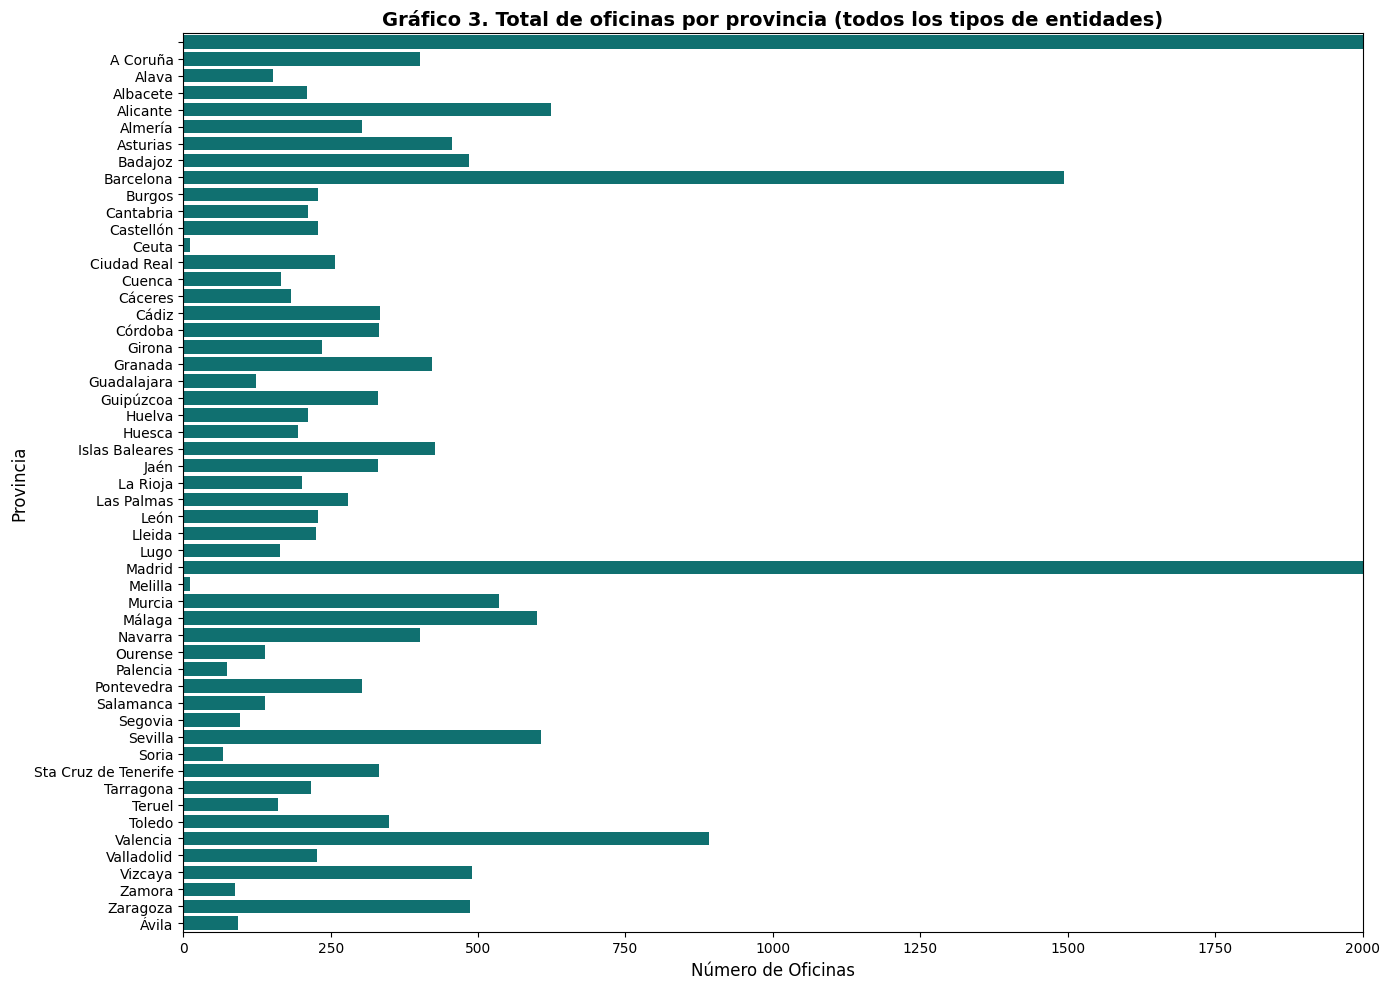

In [ ]:
# Gráfico con Todos los Tipos de Entidades Financieras en Una Sola Barra
# Paso 1: Agrupar datos por Provincia (sin separar por tipo de entidad)
oficinas_totales_por_provincia = (
    df_list_todos.groupby("Provincia")["Nº de oficinas"]
    .sum()
    .reset_index()
)

# Paso 2: Crear el gráfico de una sola barra por provincia
plt.figure(figsize=(14, 10))
sns.barplot(
    data=oficinas_totales_por_provincia,
    y="Provincia",
    x="Nº de oficinas",
    color="teal",  # Color uniforme para todas las barras
    orient="h",
    width=0.8 # Grosor de las barras
)

# Personalizar el gráfico
plt.title("Gráfico 3. Total de oficinas por provincia (todos los tipos de entidades)", fontsize=14, fontweight="bold")
plt.xlabel("Número de Oficinas", fontsize=12)
plt.ylabel("Provincia", fontsize=12)

# Acotar el eje horizontal a un máximo de 2000 oficinas
plt.xlim(0, 2000)

plt.tight_layout()



Ocurrió un error al cargar el archivo: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/TFG/processed/listado_oficinas_procesado.csv'


<Figure size 1600x1000 with 0 Axes>

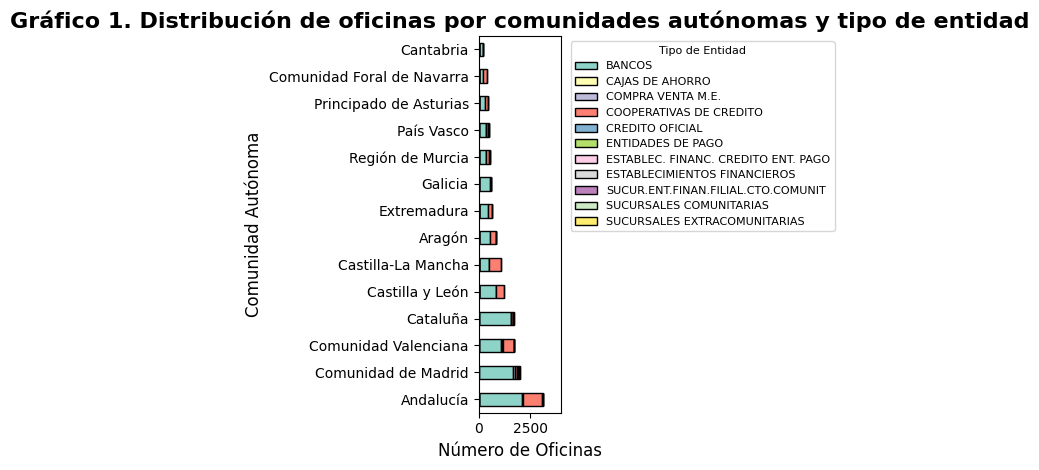

In [ ]:
#Gráfico para comunidades autonómas
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Cargar el archivo CSV limpio
try:
    df_list_todos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFG/processed/listado_oficinas_procesado.csv', encoding="utf-8")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

# Paso 2: Crear la columna "Comunidad Autónoma" si no existe
provincias_a_comunidades = {
    "Álava": "País Vasco",
    "Albacete": "Castilla-La Mancha",
    "Alicante": "Comunidad Valenciana",
    "Almería": "Andalucía",
    "Asturias": "Principado de Asturias",
    "Ávila": "Castilla y León",
    "Badajoz": "Extremadura",
    "Baleares, Islas": "Islas Baleares",
    "Barcelona": "Cataluña",
    "Burgos": "Castilla y León",
    "Cáceres": "Extremadura",
    "Cádiz": "Andalucía",
    "Cantabria": "Cantabria",
    "Castellón": "Comunidad Valenciana",
    "Ciudad Real": "Castilla-La Mancha",
    "Córdoba": "Andalucía",
    "Coruña, A": "Galicia",
    "Cuenca": "Castilla-La Mancha",
    "Gipuzkoa": "País Vasco",
    "Granada": "Andalucía",
    "Guadalajara": "Castilla-La Mancha",
    "Huelva": "Andalucía",
    "Huesca": "Aragón",
    "Jaén": "Andalucía",
    "León": "Castilla y León",
    "Lugo": "Galicia",
    "Madrid": "Comunidad de Madrid",
    "Málaga": "Andalucía",
    "Murcia": "Región de Murcia",
    "Navarra": "Comunidad Foral de Navarra",
    "Ourense": "Galicia",
    "Palencia": "Castilla y León",
    "Pontevedra": "Galicia",
    "Salamanca": "Castilla y León",
    "Segovia": "Castilla y León",
    "Sevilla": "Andalucía",
    "Soria": "Castilla y León",
    "Tarragona": "Cataluña",
    "Santa Cruz de Tenerife": "Canarias",
    "Teruel": "Aragón",
    "Toledo": "Castilla-La Mancha",
    "Valencia": "Comunidad Valenciana",
    "Valladolid": "Castilla y León",
    "Vizcaya": "País Vasco",
    "Zamora": "Castilla y León",
    "Zaragoza": "Aragón"
}

df_list_todos["Comunidad Autónoma"] = df_list_todos["Provincia"].map(provincias_a_comunidades)

# Paso 3: Agrupar datos por Comunidad Autónoma y Tipo Entidad
oficinas_por_comunidad_tipo = (
    df_list_todos.groupby(["Comunidad Autónoma", "Tipo Entidad"])["Nº de oficinas"]
    .sum()
    .reset_index()
)

# Paso 4: Crear una tabla pivote para organizar los datos
tabla_pivote = oficinas_por_comunidad_tipo.pivot(index="Comunidad Autónoma", columns="Tipo Entidad", values="Nº de oficinas").fillna(0)

# Paso 5: Ordenar las comunidades por el número total de oficinas (de mayor a menor)
tabla_pivote["Total"] = tabla_pivote.sum(axis=1)  # Añadir columna de totales
tabla_pivote = tabla_pivote.sort_values(by="Total", ascending=False).drop(columns="Total")  # Ordenar y eliminar columna auxiliar

# Paso 6: Crear el gráfico de barras apiladas horizontales
plt.figure(figsize=(16, 10))  # Aumentar el tamaño del gráfico
ax = tabla_pivote.plot(kind="barh", stacked=True, colormap="Set3", edgecolor="black")

# Personalizar el gráfico
plt.title("Gráfico 1. Distribución de oficinas por comunidades autónomas y tipo de entidad", fontsize=16, fontweight="bold")
plt.xlabel("Número de Oficinas", fontsize=12)
plt.ylabel("Comunidad Autónoma", fontsize=12)

# Rotar las etiquetas del eje y para mejorar la legibilidad
plt.yticks(fontsize=10, rotation=0)

# Reducir el tamaño de la leyenda
legend = plt.legend(title="Tipo de Entidad", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.setp(legend.get_title(), fontsize='8')  # Reducir el tamaño del título de la leyenda

# Acotar el eje horizontal a un máximo de 2000 oficinas
plt.xlim(0, 4000)

plt.tight_layout()


*Cálculo de los Índices de concentración bancaria. Con código de LaTeX para darle formato a las "fórmulas" de los indices*

In [ ]:
# Librerías generales
import pandas as pd
import numpy as np

In [ ]:
provincias_a_comunidades = {
    "Álava": "País Vasco",
    "Albacete": "Castilla-La Mancha",
    "Alicante": "Comunidad Valenciana",
    "Almería": "Andalucía",
    # ... (completa con todas las provincias)
}

df_list_todos["Comunidad Autónoma"] = df_list_todos["Provincia"].map(provincias_a_comunidades)

*Código de Python para calcular índices de concentración bancaria*

In [ ]:
# Índice Herfindahl-Hirschman (HHI)
# El HHI se calcula como la suma de los cuadrados de las cuotas de mercado de cada entidad.

def calcular_hhi(oficinas):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas / total_oficinas
    hhi = (cuotas_mercado ** 2).sum() * 10000  # Multiplicamos por 10,000 para escalar
    return hhi

In [ ]:
# Cuotas de Mercado (C1, C3, C5)
# Estas son las cuotas acumuladas de las 1, 3 y 5 entidades más grandes.

def calcular_cuotas(oficinas, k=1):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas.sort_values(ascending=False) / total_oficinas
    return cuotas_mercado[:k].sum() * 100  # Multiplicamos por 100 para obtener porcentaje

In [ ]:
# Índice de Entropía (E)
# La entropía mide la diversidad de las entidades en el mercado.

def calcular_entropia(oficinas):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas / total_oficinas
    entropia = -np.sum(cuotas_mercado * np.log(cuotas_mercado + 1e-10))  # Evitar log(0)
    return entropia

In [ ]:
# Crear la columna comunidades autónomas
provincias_a_comunidades = {
    "Álava": "País Vasco",
    "Albacete": "Castilla-La Mancha",
    "Alicante": "Comunidad Valenciana",
    "Almería": "Andalucía",
    # ... (completa con todas las provincias)
}

df_list_todos["Comunidad Autónoma"] = df_list_todos["Provincia"].map(provincias_a_comunidades)

In [ ]:
# Cálculo de los ïndices por provincias

# Agrupar por provincia y calcular los índices
indices_por_provincia = (
    df_list_todos.groupby("Provincia")["Nº de oficinas"]
    .apply(lambda x: pd.Series({
        "HHI": calcular_hhi(x),
        "C1": calcular_cuotas(x, k=1),
        "C3": calcular_cuotas(x, k=3),
        "C5": calcular_cuotas(x, k=5),
        "Entropia": calcular_entropia(x)
    }))
    .reset_index()
)

# Mostrar la tabla de resultados por provincias
print("Tabla de Índices de Concentración por Provincias:")
print(indices_por_provincia)

Tabla de Índices de Concentración por Provincias:
    Provincia   level_1  Nº de oficinas
0                   HHI     2114.226053
1                    C1       24.649355
2                    C3       69.385456
3                    C5      100.000000
4              Entropia        1.577490
..        ...       ...             ...
260     Ávila       HHI      190.773500
261     Ávila        C1        8.602151
262     Ávila        C3       15.053763
263     Ávila        C5       19.354839
264     Ávila  Entropia        4.253032

[265 rows x 3 columns]


In [ ]:
# Calcular Índices por Comunidades Autónomas
# Agrupar por comunidad autónoma y calcular los índices
indices_por_comunidad = (
    df_list_todos.groupby("Comunidad Autónoma")["Nº de oficinas"]
    .apply(lambda x: pd.Series({
        "HHI": calcular_hhi(x),
        "C1": calcular_cuotas(x, k=1),
        "C3": calcular_cuotas(x, k=3),
        "C5": calcular_cuotas(x, k=5),
        "Entropia": calcular_entropia(x)
    }))
    .reset_index()
)

# Mostrar la tabla de resultados por comunidades autónomas
print("\nTabla de Índices de Concentración por Comunidades Autónomas:")
print(indices_por_comunidad)


Tabla de Índices de Concentración por Comunidades Autónomas:
      Comunidad Autónoma   level_1  Nº de oficinas
0              Andalucía       HHI      127.983095
1              Andalucía        C1        6.930693
2              Andalucía        C3       13.531353
3              Andalucía        C5       18.481848
4              Andalucía  Entropia        5.006255
5     Castilla-La Mancha       HHI      138.321995
6     Castilla-La Mancha        C1        7.142857
7     Castilla-La Mancha        C3       14.761905
8     Castilla-La Mancha        C5       19.523810
9     Castilla-La Mancha  Entropia        4.825585
10  Comunidad Valenciana       HHI       52.327963
11  Comunidad Valenciana        C1        2.568218
12  Comunidad Valenciana        C3        7.062600
13  Comunidad Valenciana        C5       10.914928
14  Comunidad Valenciana  Entropia        5.791246


Muestra de código de texto en Markdown para poner los índices en lenguaje "matemático"

In [ ]:
#Prueba de código de LaTeX para poner las fórmulas en el TFG

# Supongamos que tienes los resultados de los índices
hhi = 2500
c1 = 40.0
c3 = 70.0
c5 = 85.0
entropia = 1.2

# Crear el contenido LaTeX
latex_content = f"""
\documentclass[12pt]{{article}}
\\usepackage[utf8]{{inputenc}}
\\usepackage{{amsmath}}

\\title{{Resultados de los Índices de Concentración Bancaria}}
\\author{{}}
\\date{{}}

\\begin{{document}}

\\maketitle

\\section*{{Resultados de los Índices}}

\\subsection*{{1. Índice Herfindahl-Hirschman (HHI)}}
El valor del HHI es: {hhi}. Un valor superior a 1800 puntos indica un mercado altamente concentrado.

\\subsection*{{2. Cuotas de Mercado (C1, C3, C5)}}
\\begin{{itemize}}
    \\item C1: {c1}\%
    \\item C3: {c3}\%
    \\item C5: {c5}\%
\\end{{itemize}}

\\subsection*{{3. Índice de Entropía (E)}}
El valor del índice de entropía es: {entropia}. Un valor más alto indica una mayor diversidad en el mercado.

\\end{{document}}
"""

# Guardar el contenido en un archivo .tex
with open("resultados_indices.tex", "w", encoding="utf-8") as file:
    file.write(latex_content)

print("Archivo LaTeX generado exitosamente.")

Archivo LaTeX generado exitosamente.


In [ ]:
#Prueba para generar el código de Python con la librería IPython.display

from IPython.display import display, Markdown

# Definición de los índices en formato Markdown con LaTeX
indices_markdown = """
# Índices de Concentración Bancaria

## 1. Índice Herfindahl-Hirschman (HHI)

El **Índice Herfindahl-Hirschman (HHI)** mide la concentración del mercado. Se calcula como la suma de los cuadrados de las cuotas de mercado de cada entidad financiera:

$$
HHI = \\sum_{i=1}^{N} \\left( \\frac{S_i}{T} \\right)^2 \\times 10,000
$$

Donde:
- $ S_i $: Número de oficinas de la entidad $ i $.
- $ T $: Total de oficinas en el mercado.
- $ N $: Número total de entidades financieras.

Un valor más alto del HHI indica una mayor concentración en el mercado.

---

## 2. Cuotas de Mercado ($ C_1 $, $ C_3 $, $ C_5 $)

Las **cuotas de mercado** representan la participación acumulada de las $ k $ entidades más grandes en el mercado. Las fórmulas son las siguientes:

$$
C_k = \\sum_{i=1}^{k} \\frac{S_i}{T} \\times 100
$$

Donde:
- $ C_1 $: Participación de la entidad más grande.
- $ C_3 $: Participación acumulada de las 3 entidades más grandes.
- $ C_5 $: Participación acumulada de las 5 entidades más grandes.

Estos índices son útiles para analizar la dominancia de unas pocas entidades en el mercado.

---

## 3. Índice de Entropía ($ E $)

El **Índice de Entropía ($ E $)** mide la diversidad del mercado. A diferencia del HHI, este índice tiene una relación inversa con la concentración. La fórmula es:

$$
E = -\\sum_{i=1}^{N} \\left( \\frac{S_i}{T} \\right) \\ln\\left( \\frac{S_i}{T} \\right)
$$

Donde:
- $ S_i $: Número de oficinas de la entidad $ i $.
- $ T $: Total de oficinas en el mercado.
- $ N $: Número total de entidades financieras.

Un valor más alto del índice de entropía indica una menor concentración y una mayor diversidad en el mercado.

---

## Interpretación de los Índices

- **HHI**: Valores superiores a 1800 puntos indican mercados altamente concentrados.
- **$ C_1 $, $ C_3 $, $ C_5 $**: Un aumento en estas cuotas sugiere una mayor dominancia de unas pocas entidades.
- **Entropía**: Un valor cercano a cero indica monopolio, mientras que valores más altos reflejan mercados más competitivos.
"""

# Mostrar el contenido en Google Colab
display(Markdown(indices_markdown))


# Índices de Concentración Bancaria

## 1. Índice Herfindahl-Hirschman (HHI)

El **Índice Herfindahl-Hirschman (HHI)** mide la concentración del mercado. Se calcula como la suma de los cuadrados de las cuotas de mercado de cada entidad financiera:

$$
HHI = \sum_{i=1}^{N} \left( \frac{S_i}{T} \right)^2 \times 10,000
$$

Donde:
- $ S_i $: Número de oficinas de la entidad $ i $.
- $ T $: Total de oficinas en el mercado.
- $ N $: Número total de entidades financieras.

Un valor más alto del HHI indica una mayor concentración en el mercado.

---

## 2. Cuotas de Mercado ($ C_1 $, $ C_3 $, $ C_5 $)

Las **cuotas de mercado** representan la participación acumulada de las $ k $ entidades más grandes en el mercado. Las fórmulas son las siguientes:

$$
C_k = \sum_{i=1}^{k} \frac{S_i}{T} \times 100
$$

Donde:
- $ C_1 $: Participación de la entidad más grande.
- $ C_3 $: Participación acumulada de las 3 entidades más grandes.
- $ C_5 $: Participación acumulada de las 5 entidades más grandes.

Estos índices son útiles para analizar la dominancia de unas pocas entidades en el mercado.

---

## 3. Índice de Entropía ($ E $)

El **Índice de Entropía ($ E $)** mide la diversidad del mercado. A diferencia del HHI, este índice tiene una relación inversa con la concentración. La fórmula es:

$$
E = -\sum_{i=1}^{N} \left( \frac{S_i}{T} \right) \ln\left( \frac{S_i}{T} \right)
$$

Donde:
- $ S_i $: Número de oficinas de la entidad $ i $.
- $ T $: Total de oficinas en el mercado.
- $ N $: Número total de entidades financieras.

Un valor más alto del índice de entropía indica una menor concentración y una mayor diversidad en el mercado.

---

## Interpretación de los Índices

- **HHI**: Valores superiores a 1800 puntos indican mercados altamente concentrados.
- **$ C_1 $, $ C_3 $, $ C_5 $**: Un aumento en estas cuotas sugiere una mayor dominancia de unas pocas entidades.
- **Entropía**: Un valor cercano a cero indica monopolio, mientras que valores más altos reflejan mercados más competitivos.


In [ ]:
#Cálculo de los índices por comunidades autónomas

import pandas as pd
import numpy as np

# Paso 1: Crear la columna "Comunidad Autónoma" si no existe
provincias_a_comunidades = {
    "Álava": "País Vasco",
    "Albacete": "Castilla-La Mancha",
    "Alicante": "Comunidad Valenciana",
    "Almería": "Andalucía",
    "Asturias": "Principado de Asturias",
    "Ávila": "Castilla y León",
    "Badajoz": "Extremadura",
    "Baleares, Islas": "Islas Baleares",
    "Barcelona": "Cataluña",
    "Burgos": "Castilla y León",
    "Cáceres": "Extremadura",
    "Cádiz": "Andalucía",
    "Cantabria": "Cantabria",
    "Castellón": "Comunidad Valenciana",
    "Ciudad Real": "Castilla-La Mancha",
    "Córdoba": "Andalucía",
    "Coruña, A": "Galicia",
    "Cuenca": "Castilla-La Mancha",
    "Gipuzkoa": "País Vasco",
    "Granada": "Andalucía",
    "Guadalajara": "Castilla-La Mancha",
    "Huelva": "Andalucía",
    "Huesca": "Aragón",
    "Jaén": "Andalucía",
    "León": "Castilla y León",
    "Lugo": "Galicia",
    "Madrid": "Comunidad de Madrid",
    "Málaga": "Andalucía",
    "Murcia": "Región de Murcia",
    "Navarra": "Comunidad Foral de Navarra",
    "Ourense": "Galicia",
    "Palencia": "Castilla y León",
    "Pontevedra": "Galicia",
    "Salamanca": "Castilla y León",
    "Segovia": "Castilla y León",
    "Sevilla": "Andalucía",
    "Soria": "Castilla y León",
    "Tarragona": "Cataluña",
    "Santa Cruz de Tenerife": "Canarias",
    "Teruel": "Aragón",
    "Toledo": "Castilla-La Mancha",
    "Valencia": "Comunidad Valenciana",
    "Valladolid": "Castilla y León",
    "Vizcaya": "País Vasco",
    "Zamora": "Castilla y León",
    "Zaragoza": "Aragón"
}

df_list_todos["Comunidad Autónoma"] = df_list_todos["Provincia"].map(provincias_a_comunidades)

# Paso 2: Funciones para calcular los índices
def calcular_hhi(oficinas):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas / total_oficinas
    hhi = (cuotas_mercado ** 2).sum() * 10000  # Multiplicamos por 10,000 para escalar
    return hhi

def calcular_cuotas(oficinas, k=1):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas.sort_values(ascending=False) / total_oficinas
    return cuotas_mercado[:k].sum() * 100  # Multiplicamos por 100 para obtener porcentaje

def calcular_entropia(oficinas):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas / total_oficinas
    entropia = -np.sum(cuotas_mercado * np.log(cuotas_mercado + 1e-10))  # Evitar log(0)
    return entropia

# Paso 3: Agrupar datos por Comunidad Autónoma y calcular los índices
indices_por_comunidad = (
    df_list_todos.groupby("Comunidad Autónoma")["Nº de oficinas"]
    .apply(lambda x: pd.Series({
        "HHI": calcular_hhi(x),
        "C1": calcular_cuotas(x, k=1),
        "C3": calcular_cuotas(x, k=3),
        "C5": calcular_cuotas(x, k=5),
        "Entropia": calcular_entropia(x)
    }))
    .reset_index()
)

# Paso 4: Mostrar la tabla de resultados
print("Tabla de Índices de Concentración por Comunidades Autónomas:")
print(indices_por_comunidad)

# Paso 5: Guardar los resultados en un archivo CSV (opcional)
indices_por_comunidad.to_csv("indices_concentracion_comunidades.csv", index=False, encoding="utf-8")

Tabla de Índices de Concentración por Comunidades Autónomas:
   Comunidad Autónoma   level_1  Nº de oficinas
0           Andalucía       HHI       18.668833
1           Andalucía        C1        1.784008
2           Andalucía        C3        4.300733
3           Andalucía        C5        6.148455
4           Andalucía  Entropia        7.237019
..                ...       ...             ...
65   Región de Murcia       HHI       94.086820
66   Región de Murcia        C1        4.672897
67   Región de Murcia        C3       11.401869
68   Región de Murcia        C5       17.009346
69   Región de Murcia  Entropia        5.443842

[70 rows x 3 columns]


In [ ]:
# Cálculo de los índices pero por provincias

# Paso 1: Funciones para calcular los índices
def calcular_hhi(oficinas):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas / total_oficinas
    hhi = (cuotas_mercado ** 2).sum() * 10000  # Multiplicamos por 10,000 para escalar
    return hhi

def calcular_cuotas(oficinas, k=1):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas.sort_values(ascending=False) / total_oficinas
    return cuotas_mercado[:k].sum() * 100  # Multiplicamos por 100 para obtener porcentaje

def calcular_entropia(oficinas):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas / total_oficinas
    entropia = -np.sum(cuotas_mercado * np.log(cuotas_mercado + 1e-10))  # Evitar log(0)
    return entropia

# Paso 2: Agrupar datos por Provincia y calcular los índices
indices_por_provincia = (
    df_list_todos.groupby("Provincia")["Nº de oficinas"]
    .apply(lambda x: pd.Series({
        "HHI": calcular_hhi(x),
        "C1": calcular_cuotas(x, k=1),
        "C3": calcular_cuotas(x, k=3),
        "C5": calcular_cuotas(x, k=5),
        "Entropia": calcular_entropia(x)
    }))
    .reset_index()
)

# Paso 3: Mostrar la tabla de resultados
print("Tabla de Índices de Concentración por Provincias:")
print(indices_por_provincia)

# Paso 4: Guardar los resultados en un archivo CSV (opcional)
indices_por_provincia.to_csv("indices_concentracion_provincias.csv", index=False, encoding="utf-8")

Tabla de Índices de Concentración por Provincias:
    Provincia   level_1  Nº de oficinas
0                   HHI     2114.226053
1                    C1       24.649355
2                    C3       69.385456
3                    C5      100.000000
4              Entropia        1.577490
..        ...       ...             ...
260     Ávila       HHI      190.773500
261     Ávila        C1        8.602151
262     Ávila        C3       15.053763
263     Ávila        C5       19.354839
264     Ávila  Entropia        4.253032

[265 rows x 3 columns]


In [ ]:
import pandas as pd
import numpy as np

# Paso 1: Crear la columna "Comunidad Autónoma" si no existe
provincias_a_comunidades = {
    "Álava": "País Vasco",
    "Albacete": "Castilla-La Mancha",
    "Alicante": "Comunidad Valenciana",
    "Almería": "Andalucía",
    "Asturias": "Principado de Asturias",
    "Ávila": "Castilla y León",
    "Badajoz": "Extremadura",
    "Baleares, Islas": "Islas Baleares",
    "Barcelona": "Cataluña",
    "Burgos": "Castilla y León",
    "Cáceres": "Extremadura",
    "Cádiz": "Andalucía",
    "Cantabria": "Cantabria",
    "Castellón": "Comunidad Valenciana",
    "Ciudad Real": "Castilla-La Mancha",
    "Córdoba": "Andalucía",
    "Coruña, A": "Galicia",
    "Cuenca": "Castilla-La Mancha",
    "Gipuzkoa": "País Vasco",
    "Granada": "Andalucía",
    "Guadalajara": "Castilla-La Mancha",
    "Huelva": "Andalucía",
    "Huesca": "Aragón",
    "Jaén": "Andalucía",
    "León": "Castilla y León",
    "Lugo": "Galicia",
    "Madrid": "Comunidad de Madrid",
    "Málaga": "Andalucía",
    "Murcia": "Región de Murcia",
    "Navarra": "Comunidad Foral de Navarra",
    "Ourense": "Galicia",
    "Palencia": "Castilla y León",
    "Pontevedra": "Galicia",
    "Salamanca": "Castilla y León",
    "Segovia": "Castilla y León",
    "Sevilla": "Andalucía",
    "Soria": "Castilla y León",
    "Tarragona": "Cataluña",
    "Santa Cruz de Tenerife": "Canarias",
    "Teruel": "Aragón",
    "Toledo": "Castilla-La Mancha",
    "Valencia": "Comunidad Valenciana",
    "Valladolid": "Castilla y León",
    "Vizcaya": "País Vasco",
    "Zamora": "Castilla y León",
    "Zaragoza": "Aragón"
}

df_list_todos["Comunidad Autónoma"] = df_list_todos["Provincia"].map(provincias_a_comunidades)

# Paso 2: Funciones para calcular los índices
def calcular_hhi(oficinas):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas / total_oficinas
    hhi = (cuotas_mercado ** 2).sum() * 10000  # Multiplicamos por 10,000 para escalar
    return hhi

def calcular_cuotas(oficinas, k=1):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas.sort_values(ascending=False) / total_oficinas
    return cuotas_mercado[:k].sum() * 100  # Multiplicamos por 100 para obtener porcentaje

def calcular_entropia(oficinas):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas / total_oficinas
    entropia = -np.sum(cuotas_mercado * np.log(cuotas_mercado + 1e-10))  # Evitar log(0)
    return entropia

# Paso 3: Calcular los índices por Provincia
indices_por_provincia = (
    df_list_todos.groupby("Provincia")["Nº de oficinas"]
    .apply(lambda x: pd.Series({
        "HHI": calcular_hhi(x),
        "C1 (%)": calcular_cuotas(x, k=1),
        "C3 (%)": calcular_cuotas(x, k=3),
        "C5 (%)": calcular_cuotas(x, k=5),
        "Entropia": calcular_entropia(x)
    }))
    .reset_index()
)

# Paso 4: Calcular los índices por Comunidad Autónoma
indices_por_comunidad = (
    df_list_todos.groupby("Comunidad Autónoma")["Nº de oficinas"]
    .apply(lambda x: pd.Series({
        "HHI": calcular_hhi(x),
        "C1 (%)": calcular_cuotas(x, k=1),
        "C3 (%)": calcular_cuotas(x, k=3),
        "C5 (%)": calcular_cuotas(x, k=5),
        "Entropia": calcular_entropia(x)
    }))
    .reset_index()
)

# Paso 5: Mostrar las tablas completas
print("Tabla de Índices de Concentración por Provincias:")
print(indices_por_provincia)

print("\nTabla de Índices de Concentración por Comunidades Autónomas:")
print(indices_por_comunidad)

# Paso 6: Guardar los resultados en archivos CSV (opcional)
indices_por_provincia.to_csv("indices_concentracion_provincias.csv", index=False, encoding="utf-8")
indices_por_comunidad.to_csv("indices_concentracion_comunidades.csv", index=False, encoding="utf-8")

Tabla de Índices de Concentración por Provincias:
    Provincia   level_1  Nº de oficinas
0                   HHI     2114.226053
1                C1 (%)       24.649355
2                C3 (%)       69.385456
3                C5 (%)      100.000000
4              Entropia        1.577490
..        ...       ...             ...
260     Ávila       HHI      190.773500
261     Ávila    C1 (%)        8.602151
262     Ávila    C3 (%)       15.053763
263     Ávila    C5 (%)       19.354839
264     Ávila  Entropia        4.253032

[265 rows x 3 columns]

Tabla de Índices de Concentración por Comunidades Autónomas:
   Comunidad Autónoma   level_1  Nº de oficinas
0           Andalucía       HHI       18.668833
1           Andalucía    C1 (%)        1.784008
2           Andalucía    C3 (%)        4.300733
3           Andalucía    C5 (%)        6.148455
4           Andalucía  Entropia        7.237019
..                ...       ...             ...
65   Región de Murcia       HHI       94.086820


In [ ]:
# Exportar las tablas a un archivo Excel
with pd.ExcelWriter("indices_concentracion.xlsx", engine="openpyxl") as writer:
    indices_por_provincia.to_excel(writer, sheet_name="Por Provincia", index=False)
    indices_por_comunidad.to_excel(writer, sheet_name="Por Comunidad", index=False)

print("Las tablas han sido guardadas en un archivo Excel.")

Las tablas han sido guardadas en un archivo Excel.


In [ ]:
# Exportar las tablas a archivos CSV
indices_por_provincia.to_csv("indices_concentracion_provincias.csv", index=False, encoding="utf-8")
indices_por_comunidad.to_csv("indices_concentracion_comunidades.csv", index=False, encoding="utf-8")

print("Las tablas han sido guardadas como archivos CSV.")

Las tablas han sido guardadas como archivos CSV.


In [ ]:
print(df_list_todos.head())

  Cód. Tipo Entidad Tipo Entidad Cód. Entidad                    Entidad  \
0                BP       BANCOS            3  BANCO DE DEPOSITOS   S.A.   
1                BP       BANCOS           11       ALLFUNDS BANK   S.A.   
2                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   
3                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   
4                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   

  Cód. País    País Cód. Provincia Provincia Cód. Municipio         Municipio  \
0        ES  ESPAÑA             28    Madrid             79            MADRID   
1        ES  ESPAÑA             28    Madrid             79            MADRID   
2        ES  ESPAÑA              1     Alava             59   VITORIA-GASTEIZ   
3        ES  ESPAÑA              3  Alicante             14  ALICANTE/ALACANT   
4        ES  ESPAÑA              3  Alicante             18             ALTEA   

   Nº de oficinas    Comunidad Autónoma  
0             

In [ ]:
# Código de Pyhton agrupado para índices por comunidades autónomas (visualizadas por separado)

# Agregar la columna "Comunidad Autónoma"
df_list_todos["Comunidad Autónoma"] = df_list_todos["Provincia"].map(provincias_a_comunidades)

# Verificar el DataFrame inicial
print("\n--- Estructura inicial del DataFrame ---")
print(df_list_todos.head())


# Paso 2: Funciones para calcular los índices
def calcular_hhi(oficinas):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas / total_oficinas
    hhi = (cuotas_mercado ** 2).sum() * 10000  # Multiplicamos por 10,000 para escalar
    return hhi

def calcular_cuotas(oficinas, k=1):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas.sort_values(ascending=False) / total_oficinas
    return cuotas_mercado[:k].sum() * 100  # Multiplicamos por 100 para obtener porcentaje

def calcular_entropia(oficinas):
    total_oficinas = oficinas.sum()
    cuotas_mercado = oficinas / total_oficinas
    entropia = -np.sum(cuotas_mercado * np.log(cuotas_mercado + 1e-10))  # Evitar log(0)
    return entropia
# Paso 3: Calcular los índices por Comunidad Autónoma
# Usamos un diccionario para almacenar los resultados
resultados = []

for comunidad, grupo in df_list_todos.groupby("Comunidad Autónoma"):
    hhi = calcular_hhi(grupo["Nº de oficinas"])
    c1 = calcular_cuotas(grupo["Nº de oficinas"], k=1)
    c3 = calcular_cuotas(grupo["Nº de oficinas"], k=3)
    c5 = calcular_cuotas(grupo["Nº de oficinas"], k=5)
    entropia = calcular_entropia(grupo["Nº de oficinas"])

    resultados.append({
        "Comunidad Autónoma": comunidad,
        "HHI": hhi,
        "C1 (%)": c1,
        "C3 (%)": c3,
        "C5 (%)": c5,
        "Entropía": entropia
    })

# Convertir los resultados en un DataFrame
indices_por_comunidad = pd.DataFrame(resultados)

# Paso 4: Verificar el contenido del DataFrame generado
print("\n--- Contenido del DataFrame 'indices_por_comunidad' ---")
print(indices_por_comunidad.head())

# Paso 5: Dividir los índices en tablas separadas
tabla_hhi = indices_por_comunidad[["Comunidad Autónoma", "HHI"]]
tabla_c1 = indices_por_comunidad[["Comunidad Autónoma", "C1 (%)"]]
tabla_c3 = indices_por_comunidad[["Comunidad Autónoma", "C3 (%)"]]
tabla_c5 = indices_por_comunidad[["Comunidad Autónoma", "C5 (%)"]]
tabla_entropia = indices_por_comunidad[["Comunidad Autónoma", "Entropía"]]

# Paso 6: Visualizar las primeras filas de cada tabla
print("\n--- Tabla HHI ---")
print(tabla_hhi.head())

print("\n--- Tabla C1 (%) ---")
print(tabla_c1.head())

print("\n--- Tabla C3 (%) ---")
print(tabla_c3.head())

print("\n--- Tabla C5 (%) ---")
print(tabla_c5.head())

print("\n--- Tabla Entropía ---")
print(tabla_entropia.head())

# Paso 7: Exportar las tablas a archivos CSV
tabla_hhi.to_csv("hhi_comunidades.csv", index=False, encoding="utf-8")
tabla_c1.to_csv("c1_comunidades.csv", index=False, encoding="utf-8")
tabla_c3.to_csv("c3_comunidades.csv", index=False, encoding="utf-8")
tabla_c5.to_csv("c5_comunidades.csv", index=False, encoding="utf-8")
tabla_entropia.to_csv("entropia_comunidades.csv", index=False, encoding="utf-8")

print("\nLas tablas han sido guardadas como archivos CSV.")

# Paso 8: Exportar las tablas a un archivo Excel con hojas separadas
with pd.ExcelWriter("indices_concentracion_comunidades.xlsx", engine="openpyxl") as writer:
    tabla_hhi.to_excel(writer, sheet_name="HHI", index=False)
    tabla_c1.to_excel(writer, sheet_name="C1", index=False)
    tabla_c3.to_excel(writer, sheet_name="C3", index=False)
    tabla_c5.to_excel(writer, sheet_name="C5", index=False)
    tabla_entropia.to_excel(writer, sheet_name="Entropía", index=False)

print("\nLas tablas han sido guardadas en un archivo Excel.")






--- Estructura inicial del DataFrame ---
  Cód. Tipo Entidad Tipo Entidad Cód. Entidad                    Entidad  \
0                BP       BANCOS            3  BANCO DE DEPOSITOS   S.A.   
1                BP       BANCOS           11       ALLFUNDS BANK   S.A.   
2                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   
3                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   
4                BP       BANCOS           19     DEUTSCHE BANK   S.A.E.   

  Cód. País    País Cód. Provincia Provincia Cód. Municipio         Municipio  \
0        ES  ESPAÑA             28    Madrid             79            MADRID   
1        ES  ESPAÑA             28    Madrid             79            MADRID   
2        ES  ESPAÑA              1     Alava             59   VITORIA-GASTEIZ   
3        ES  ESPAÑA              3  Alicante             14  ALICANTE/ALACANT   
4        ES  ESPAÑA              3  Alicante             18             ALTEA   

   Nº de ofici

In [ ]:
# Código de Pyhton agrupado para índices por provincias


# Paso 1: Verificar que las columnas necesarias existen en el DataFrame
if "Provincia" not in df_list_todos.columns or "Nº de oficinas" not in df_list_todos.columns:
    raise KeyError("Las columnas 'Provincia' o 'Nº de oficinas' no están presentes en el DataFrame. Verifica el nombre de las columnas.")

# Paso 2: Funciones para calcular los índices
def calcular_hhi(oficinas):
    total_oficinas = oficinas.sum()
    if total_oficinas == 0:  # Evitar división por cero
        return 0
    cuotas_mercado = oficinas / total_oficinas
    hhi = (cuotas_mercado ** 2).sum() * 10000  # Multiplicamos por 10,000 para escalar
    return hhi
def calcular_cuotas(oficinas, k=1):
    total_oficinas = oficinas.sum()
    if total_oficinas == 0:  # Evitar división por cero
        return 0
    cuotas_mercado = oficinas.sort_values(ascending=False) / total_oficinas
    return cuotas_mercado[:k].sum() * 100  # Multiplicamos por 100 para obtener porcentaje

def calcular_entropia(oficinas):
    total_oficinas = oficinas.sum()
    if total_oficinas == 0:  # Evitar log(0)
        return 0
    cuotas_mercado = oficinas / total_oficinas
    entropia = -np.sum(cuotas_mercado * np.log(cuotas_mercado + 1e-10))  # Evitar log(0)
    return entropia

# Paso 3: Calcular los índices por Provincia
# Usamos un bucle explícito para iterar sobre cada provincia y calcular los índices
resultados = []

for provincia, grupo in df_list_todos.groupby("Provincia"):
    hhi = calcular_hhi(grupo["Nº de oficinas"])
    c1 = calcular_cuotas(grupo["Nº de oficinas"], k=1)
    c3 = calcular_cuotas(grupo["Nº de oficinas"], k=3)
    c5 = calcular_cuotas(grupo["Nº de oficinas"], k=5)
    entropia = calcular_entropia(grupo["Nº de oficinas"])

    resultados.append({
        "Provincia": provincia,
        "HHI": hhi,
        "C1 (%)": c1,
        "C3 (%)": c3,
        "C5 (%)": c5,
        "Entropía": entropia
    })

# Convertir los resultados en un DataFrame
indices_por_provincia = pd.DataFrame(resultados)

# Paso 4: Verificar el contenido del DataFrame generado
print("\n--- Contenido del DataFrame 'indices_por_provincia' ---")
print(indices_por_provincia.head())

# Paso 5: Dividir los índices en tablas separadas
tabla_hhi = indices_por_provincia[["Provincia", "HHI"]]
tabla_c1 = indices_por_provincia[["Provincia", "C1 (%)"]]
tabla_c3 = indices_por_provincia[["Provincia", "C3 (%)"]]
tabla_c5 = indices_por_provincia[["Provincia", "C5 (%)"]]
tabla_entropia = indices_por_provincia[["Provincia", "Entropía"]]

# Paso 6: Visualizar las primeras filas de cada tabla
print("\n--- Tabla HHI ---")
print(tabla_hhi.head())

print("\n--- Tabla C1 (%) ---")
print(tabla_c1.head())

print("\n--- Tabla C3 (%) ---")
print(tabla_c3.head())

print("\n--- Tabla C5 (%) ---")
print(tabla_c5.head())

print("\n--- Tabla Entropía ---")
print(tabla_entropia.head())

# Paso 7: Exportar las tablas a archivos CSV
tabla_hhi.to_csv("hhi_provincias.csv", index=False, encoding="utf-8")
tabla_c1.to_csv("c1_provincias.csv", index=False, encoding="utf-8")
tabla_c3.to_csv("c3_provincias.csv", index=False, encoding="utf-8")
tabla_c5.to_csv("c5_provincias.csv", index=False, encoding="utf-8")
tabla_entropia.to_csv("entropia_provincias.csv", index=False, encoding="utf-8")

print("\nLas tablas han sido guardadas como archivos CSV.")

# Paso 8: Exportar las tablas a un archivo Excel con hojas separadas
with pd.ExcelWriter("indices_concentracion_provincias.xlsx", engine="openpyxl") as writer:
    tabla_hhi.to_excel(writer, sheet_name="HHI", index=False)
    tabla_c1.to_excel(writer, sheet_name="C1", index=False)
    tabla_c3.to_excel(writer, sheet_name="C3", index=False)
    tabla_c5.to_excel(writer, sheet_name="C5", index=False)
    tabla_entropia.to_excel(writer, sheet_name="Entropía", index=False)

print("\nLas tablas han sido guardadas en un archivo Excel.")

from google.colab import files





--- Contenido del DataFrame 'indices_por_provincia' ---
  Provincia          HHI     C1 (%)     C3 (%)      C5 (%)  Entropía
0            2114.226053  24.649355  69.385456  100.000000  1.577490
1  A Coruña   141.333135   8.208955  14.925373   20.895522  5.145931
2     Alava   602.493075  14.473684  36.184211   49.342105  3.514281
3  Albacete   138.321995   7.142857  14.761905   19.523810  4.825585
4  Alicante    52.327963   2.568218   7.062600   10.914928  5.791246

--- Tabla HHI ---
  Provincia          HHI
0            2114.226053
1  A Coruña   141.333135
2     Alava   602.493075
3  Albacete   138.321995
4  Alicante    52.327963

--- Tabla C1 (%) ---
  Provincia     C1 (%)
0            24.649355
1  A Coruña   8.208955
2     Alava  14.473684
3  Albacete   7.142857
4  Alicante   2.568218

--- Tabla C3 (%) ---
  Provincia     C3 (%)
0            69.385456
1  A Coruña  14.925373
2     Alava  36.184211
3  Albacete  14.761905
4  Alicante   7.062600

--- Tabla C5 (%) ---
  Provincia      C

In [ ]:
# Descargar las tablas anteriormente generadas

from google.colab import files

# Paso 1: Verificar que los archivos existen
import os

archivos_a_descargar = [
    "hhi_provincias.csv",
    "c1_provincias.csv",
    "c3_provincias.csv",
    "c5_provincias.csv",
    "entropia_provincias.csv",
    "indices_concentracion_provincias.xlsx"
]

for archivo in archivos_a_descargar:
    if os.path.exists(archivo):
        print(f"El archivo {archivo} está listo para ser descargado.")
    else:
        print(f"El archivo {archivo} no se encontró. Verifica que se haya generado correctamente.")

# Paso 2: Descargar los archivos CSV y Excel
for archivo in archivos_a_descargar:
    if os.path.exists(archivo):
        files.download(archivo)
        print(f"Descargando {archivo}...")
    else:
        print(f"No se pudo descargar {archivo} porque no existe.")

El archivo hhi_provincias.csv está listo para ser descargado.
El archivo c1_provincias.csv está listo para ser descargado.
El archivo c3_provincias.csv está listo para ser descargado.
El archivo c5_provincias.csv está listo para ser descargado.
El archivo entropia_provincias.csv está listo para ser descargado.
El archivo indices_concentracion_provincias.xlsx está listo para ser descargado.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando hhi_provincias.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando c1_provincias.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando c3_provincias.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando c5_provincias.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando entropia_provincias.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando indices_concentracion_provincias.xlsx...


*Pruebas de Mapas*

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geográficos (shapefile)
provincias = gpd.read_file("provincias.shp")

# Cargar datos de concentración bancaria
datos_concentracion = pd.read_csv("indices_concentracion.csv")

# Unir datos
provincias = provincias.merge(datos_concentracion, on="Provincia", how="left")

# Crear mapa
fig, ax = plt.subplots(1, figsize=(10, 10))
provincias.plot(column="HHI", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
plt.title("Índice de Concentración Bancaria (HHI) por Provincia")
plt.show()

*No se adjuntan celdas de código completas con las visualizaciones de los mapas (la variación de la concetración es mínima de un año a otro, por motivo de autoría no es recomendable compartirlo. En el archivo README os adjunto diferentes capturas de los mapas y de su generación)